In [29]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#read the file
df = pd.read_csv(r'C:\Users\mdeek\Documents\Python Demo\SampleSuperstore.csv',encoding='latin1')
#print the overview of the file, usually the first five rows
print("Initial Data Overview:")
print(df.head())

Initial Data Overview:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category 

In [11]:
#print the datatype of each columns
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float6

In [12]:
#print summary statistics for all numeric columns
print("\nSummary Stats:")
print(df.describe())


Summary Stats:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [18]:
#check for null values
print("\nNull values per column:")
print(df.isnull().sum())


Null values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Profit Margin    0
dtype: int64


In [33]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.drop(columns=['Postal Code'], inplace=True)

In [34]:
# Create a 'Profit Margin' column
df['Profit Margin'] = np.where(df['Sales'] != 0, df['Profit'] / df['Sales'], 0)

In [35]:
# Total sales and profit by Region
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
print("\nTotal Sales and Profit by Region:")
print(region_summary)


Total Sales and Profit by Region:
    Region        Sales       Profit
0  Central  501239.8908   39706.3625
1     East  678781.2400   91522.7800
2    South  391721.9050   46749.4303
3     West  725457.8245  108418.4489


In [36]:
# Average discount by Category
discount_summary = df.groupby('Category')['Discount'].mean().reset_index()
print("\nAverage Discount by Category:")
print(discount_summary)


Average Discount by Category:
          Category  Discount
0        Furniture  0.173923
1  Office Supplies  0.157285
2       Technology  0.132323


In [37]:
# Example: High-profit orders sorted descending
high_profit_orders = df[df['Profit'] > 100].sort_values(by='Profit', ascending=False)
print("\nTop High-Profit Orders:")
print(high_profit_orders[['Order ID', 'Product Name', 'Profit']].head())


Top High-Profit Orders:
            Order ID                                      Product Name  \
6826  CA-2016-118689             Canon imageCLASS 2200 Advanced Copier   
8153  CA-2017-140151             Canon imageCLASS 2200 Advanced Copier   
4190  CA-2017-166709             Canon imageCLASS 2200 Advanced Copier   
9039  CA-2016-117121  GBC Ibimaster 500 Manual ProClick Binding System   
4098  CA-2014-116904              Ibico EPK-21 Electric Binding System   

         Profit  
6826  8399.9760  
8153  6719.9808  
4190  5039.9856  
9039  4946.3700  
4098  4630.4755  


In [38]:
#Save the Cleaned & Analyzed Data
df.to_csv('Cleaned_Superstore_Data.csv', index=False)
region_summary.to_csv('Region_Summary.csv', index=False)
discount_summary.to_csv('Category_Discount_Summary.csv', index=False)
high_profit_orders.to_csv('High_Profit_Orders.csv', index=False)

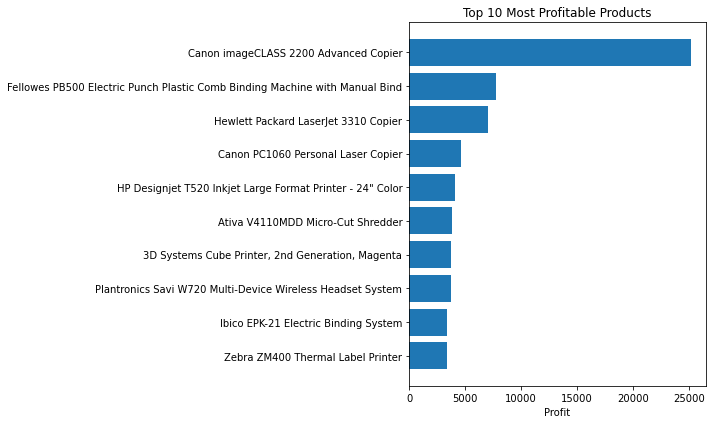

In [39]:
#optional - Visulizations
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
plt.barh(top_products['Product Name'], top_products['Profit'])
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Profit')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

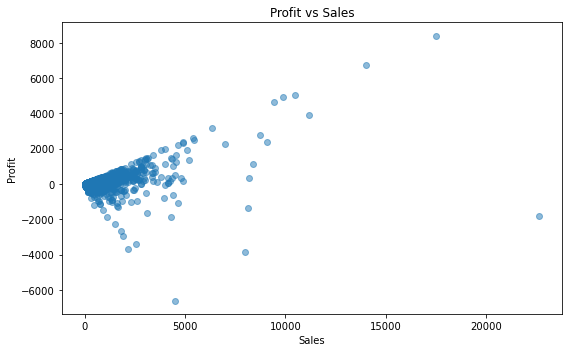

In [40]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Profit vs Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

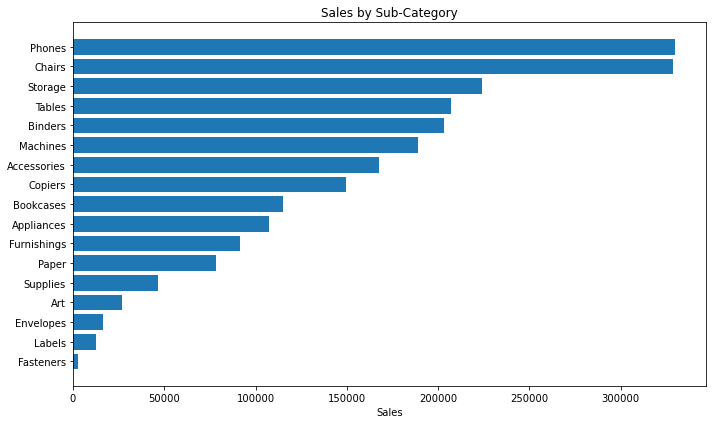

In [41]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values().reset_index()

plt.figure(figsize=(10, 6))
plt.barh(subcat_sales['Sub-Category'], subcat_sales['Sales'])
plt.title('Sales by Sub-Category')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()